**About Deep Learning**

Deep learning is an advanced form of machine learning that tries to emulate the way human brain learns. Deep learning emulates biological process of neural network by using artificial neural networks that process numerric inputs rather than electrochemical stimuli.

f(x,w,b)
- input value x: considered a vector with elements named x1, x2,...
- weight w: strengthen or weaken the effect of the x value to simulate learning
- bias b: be adjusted to tune the network so that it learns to produce correct outputs.

The neuron itself encapsulates a function that calculates a weighted sum of x, w and b. This function is in turn enclosed in an activation function that constrains the result (often to a value between 0 and 1) to determine whether or not the neuron passes an output onto the next layer of neurons in the network.

**About Deep neural network concepts**

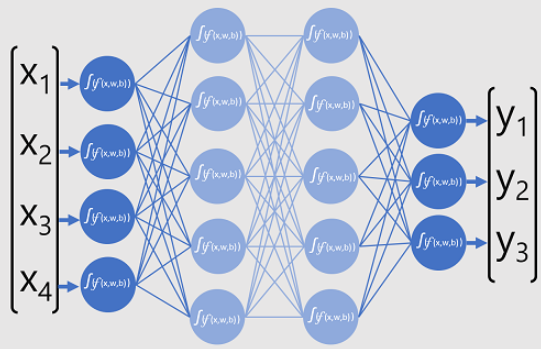

This is a deep neural network model example (source: Microsoft train) that all neurons in the input and hidden layers are connected to all neurons in the subsequent layers - so this is an fully connected network.

**Training a deep neural network**

Training process consists of multiple iterations called **epochs**. 
- Features for data observations with known label values are submitted to the input layer. Generally, these observations are grouped into batches (often referred to as mini-batches).
- The neurons then apply their function, and if activated, pass the result onto the next layer until the output layer produces a prediction.
- The prediction is compared to the actual known value, and the amount of variance between the predicted and true values (which we call the loss) is calculated.
- Based on the results, revised values for the weights and bias values are calculated to reduce the loss, and these adjustments are backpropagated to the neurons in the network layers.
- The next epoch repeats the batch training forward pass with the revised weight and bias values, hopefully improving the accuracy of the model (by reducing the loss).

**The loss functions and backpropagation**

"Suppose one of the samples passed through the training process contains features of an Adelie specimen (class 0). The correct output from the network would be [1, 0, 0]. Now suppose that the output produced by the network is [0.4, 0.3, 0.3]. Comparing these, we can calculate an absolute variance for each element (in other words, how far is each predicted value away from what it should be) as [0.6, 0.3, 0.3]."

In [2]:
import pandas as pd
penguins = pd.read_csv('penguins.csv').dropna()

Deep learning models work best when features are on similar scales. In a real solution, we 'd implement some custom normalization for each feature, but to keep things simple, we will just rescale the FlipperLength and BodyMass so they are on a similar scale to the bill measurements

In [3]:
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

#The dataset is too small to be useful for deep learning, so we will oversample it to increase its size
for i in range(1,3):
    penguins = penguins.append(penguins)

#display a random sample of 10 observation
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
263,49.8,15.9,22.9,59.50,1
75,42.8,18.5,19.5,42.50,0
289,52.0,18.1,20.1,40.50,2
341,49.6,18.2,19.3,37.75,2
97,40.3,18.5,19.6,43.50,0
28,37.9,18.6,17.2,31.50,0
293,58.0,17.8,18.1,37.00,2
172,50.2,14.3,21.8,57.00,1
49,42.3,21.2,19.1,41.50,0
320,50.9,17.9,19.6,36.75,2


The label we will predict is species column. Each label value represents a class of penguin species, encoded as 0,1,2. We show actual species and which these class labels correspond.

In [4]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 39.8 19.1 18.4 46.5 0 ] Adelie
[ 36.9 18.6 18.9 35.0 0 ] Adelie
[ 40.6 18.8 19.3 38.0 0 ] Adelie
[ 32.1 15.5 18.8 30.5 0 ] Adelie
[ 42.4 17.3 18.1 36.0 2 ] Chinstrap
[ 44.5 14.3 21.6 41.0 1 ] Gentoo
[ 49.2 18.2 19.5 44.0 2 ] Chinstrap
[ 40.6 19.0 19.9 40.0 0 ] Adelie
[ 51.4 19.0 20.1 39.5 2 ] Chinstrap
[ 47.7 15.0 21.6 47.5 1 ] Gentoo


We will split the dataset into a set of records with which to train the model, and a smaller set with which to validate the trained model

In [5]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength', 'CulmenDepth', 'FlipperLength', 'BodyMass']
label = 'Species'

#split data 70-30 into training set and test set
x_train, x_test, y_train, y_test = train_test_split(penguins[features].values, penguins[label].values, test_size = 0.3, random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')


Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinstrap)
[50.7 19.7 20.3 40.5] 2 (Chinstrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinstrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinstrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


The features are the measurements fr each penguin observation and the label is a numeric value that indicates the species of penguin that the observation represents

**Install and import TensorFlow libraries**

In [6]:
import tensorflow
#keras is an abstraction layer over the base TensorFlow API. 
#in most common machine learning scenarios, we can use Keras 
# to simplify the code
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

In [7]:
#set a random seed for reproducability
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:', keras.__version__)
print('TensorFlow version:', tensorflow.__version__)

Libraries imported.
Keras version: 2.11.0
TensorFlow version: 2.11.0


**Prepare the data**

In [8]:
#set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

print('Ready...')

Ready...


**Define a neural network**
We create 3 fully-connected layers
- an input layer that receives an input value for each feature (4 penguins measurements) and applies a ReLU activation function (f(x) = max(0, x) this function applies the rectifier function to the input which outputs the input value if it is positive and 0 if it is negative.)
- a hidden layer that receives ten inputs and applies a ReLU activation function
- An output layer that uses a SoftMax activation function to generate an output for each penguin species (which represent the classification probabilities for each of the three possible penguin species). Softmax functions produce a vector with probability values that sum to 1.

In [9]:
#define a classifier network
hl = 10 #Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=len(features), activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(len(penguin_classes), input_dim=hl, activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


**Train the model**

Use a loss function to calculate loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using te test data

In [10]:
#hyper-parameters for optimizer
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
96/96 [==============================] - 1s 4ms/step - loss: 2.7262 - accuracy: 0.1891 - val_loss: 1.2953 - val_accuracy: 0.2384
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 1.1168 - accuracy: 0.1954 - val_loss: 0.9695 - val_accuracy: 0.2044
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 0.9263 - accuracy: 0.3657 - val_loss: 0.8170 - val_accuracy: 0.2409
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 0.7774 - accuracy: 0.4995 - val_loss: 0.6867 - val_accuracy: 0.5766
Epoch 5/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6761 - val_loss: 0.5723 - val_accuracy: 0.8394
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.8600 - val_loss: 0.4409 - val_accuracy: 0.9270
Epoch 7/50
96/96 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.9101 - val_loss: 0.3452 - val_accuracy: 0.9659
Epoch 8/50
96/96 [==

- In each epoch, the full set of training data is passed forward through the network. There are four features for each observation, and 4 corresponding nodes in the input layer - so the features for each observation are passed as a vector of 4 values to that layer. However, for efficiency, the feature vectors are grouped into batches, so actually a matrix of multiple feature vectots is fed in each time. 
- The matrix of feature values is processed by a function that performs a weighted sum using initialized weights and bias values. The result of this function is then proessed by the activation function for the input layer to constrain the values passed to the nodes in the next layer.
- The weighted sum and activation functions are repeated in each layer. Note that the functions operate on vectors and matrices rather than individual scalar values. In other words, the forward pass is essentially a series of nested linear algebra functions. This is the reason data scientists prefer to use computers with graphical processing units (GPUs), since these are optimized for matrix and vector calculations.
- In the final layer of the network, the output vectors contain a probability value for each possible class (in this case, classes 0, 1, and 2). This vector is processed by a loss function to determine how far the values calculated by the network are from the actual values - so for example, suppose the output for a Gentoo penguin (class 1) observation is [0.3, 0.4, 0.3]. The correct prediction should be [0.0, 1.0, 0.0], so the variance between the predicted and actual values (how far away the each predicted value is from what it should be) is [0.3, 0.6, 0.3]. This variance is aggregated for each batch and maintained as a running aggregate to calculate the overall level of error (loss) incurred by the training data for the epoch. The accuracy (proportion of correct predictions based on the highest probability value in the output vector) for the training data is also calculated.
- At the end of each epoch, the validation data is passed through the network, and its loss and accuracy are also calculated. It's important to do this because it enables us to compare the performance of the model using data on which it was not trained, helping us determine if it will generalize well for new data or if it's overfitted to the training data.
- After all the data has been passed forward through the network, the output of the loss function for the training data (but not the validation data) is passed to the opimizer. The precise details of how the optimizer processes the loss vary depending on the specific optimization algorithm being used; but fundamentally you can think of the entire network, from the input layer to the loss function as being one big nested (composite) function. The optimizer applies some differential calculus to calculate partial derivatives for the function with respect to each weight and bias value that was used in the network. It's possible to do this efficiently for a nested function due to something called the chain rule, which enables you to determine the derivative of a composite function from the derivatives of its inner function and outer functions. You don't really need to worry about the details of the math here (the optimizer does it for you), but the end result is that the partial derivatives tell us about the slope (or gradient) of the loss function with respect to each weight and bias value - in other words, we can determine whether to increase or decrease the weight and bias values in order to decrease the loss.
- Having determined in which direction to adjust the weights and biases, the optimizer uses the learning rate to determine by how much to adjust them; and then works backwards through the network in a process called backpropagation to assign new values to the weights and biases in each layer.
- Now the next epoch repeats the whole training, validation, and backpropagation process starting with the revised weights and biases from the previous epoch - which hopefully will result in a lower level of loss.
- The process continues like this for 50 epochs.

**Review training and validation loss**

When examining the loss metrics, we look for:
- The loss should reduce with each epoch, showing that the model is learning the right weights, and biases to predict the correct labels.
- The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.

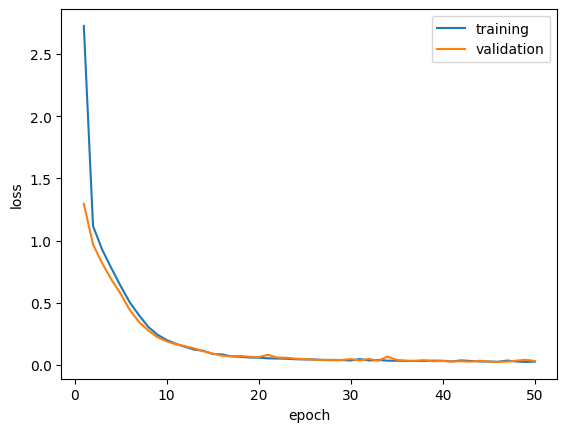

In [11]:
import matplotlib.pyplot as plt

epoch_nums = range(1, num_epochs + 1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

**View the learned weights and biases**

In [12]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.21070874 -0.45413205  0.6380667  -0.26098248 -0.10474263  0.2970046
   0.29022893 -0.60806173  0.6288563   0.673323  ]
 [-0.39596933 -0.02659911  0.6905597   0.496848    0.3418582   0.06235449
  -0.08728736  0.4202385  -0.03166765 -0.52773046]
 [ 0.38750172  0.37805474  0.24648379 -0.2907652   0.3193024  -0.47507206
   0.37502018 -0.3061698   0.36022273 -0.30836678]
 [-0.08084011 -0.12045628 -0.44078097 -0.56760824  0.29078183 -0.19861121
   0.5219342   0.25031382 -0.49812376 -0.22170658]] 
Biases:
 [ 0.          0.          0.03520612  0.          0.18430045 -0.05388517
 -0.23677975  0.          0.17944004 -0.12014487]
------------
Weights:
 [[-0.08506727 -0.04327959 -0.03186643  0.24764067 -0.21261561 -0.10690185
   0.3159396   0.05314577 -0.41090322  0.35095608]
 [-0.48087758  0.2606576  -0.4198841   0.21229357  0.09324896  0.50681734
   0.38071716  0.12445319 -0.40740097  0.4779575 ]
 [-0.03147366  0.3090454   0.21161881 -0.41218945  0.6215231   0.289280

**Evaluate model performance**

13/13 [==============================] - 0s 2ms/step


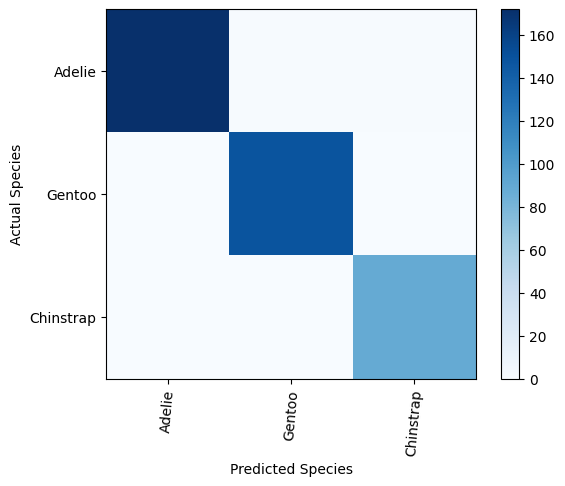

In [13]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=85)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

**Use trained model**

In [14]:
# Save the trained model
modelFileName = 'models/penguin-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

# Load the saved model
model = models.load_model(modelFileName)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(penguin_classes[predictions[0]])

model saved as models/penguin-classifier.h5
New sample: [[50.4 15.3 20.  50. ]]
1/1 [==============================] - 0s 67ms/step
Gentoo


**Convotional neural networks**

While we can use deep learning models for any kind of machine learning, they are particularly useful for dealing with data that consists of large arrays of numeric values such as images. A CNN typically works by extracting features from images, and then feeding those features into a fully connected neural network to generate a prediction. The feature extraction layers in the network have the effect of reducing the number of features from the potentially huge array of individual pixel values to a smaller feature set that supports label prediction.

**Layers in a CNN**

Convolution layers: extracts important features in images. A convolutional layer works by applying a filter to images which was defiened by a kernel that consists of a matrix of weight values.

Pooling (downsampling) layers: is used to reduce the number of feature values while retaining the key differentiating features that have been extracted. 

Dropping layers: one of the most difficult challenges in a CNN is avoideance of overfitting, where the resulting model performs well with the training data but doeasn't generalize well to new data on which it wasnt trained. One technique you can use to mitigate overfitting is to include layers in which the training process randomly eliminates feature maps. 

Flatten layers: After convolutional and pooling layers, we get the resulting feature maps which are multidimensional arays of pixel values. A flattening layer is used to flatten the feature maps into a vector of values that can be used as input to a fully connected layer.

**Training a CNN model**

A CNN is trained by passing batches of training data though it over multiple epochs, adjusting the weights and bias values based on the loss calculated for each epoch. Backpropagation of adjusted weights includes filter kernel weights used in convolutional layers as well as the weights used in fully connected layers.

3 classes:
['circle', 'square', 'triangle']


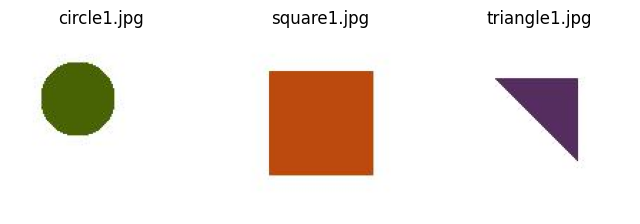

In [16]:
import matplotlib.image as mpimg
import os

#get the data
data_folder = 'shapes'

#get the class name
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

#show the first image in each folder
fig = plt.figure(figsize=(8,12))
i=0
for sub_dir in os.listdir(data_folder):
    i += 1
    img_file = os.listdir(os.path.join(data_folder, sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()


**Prepare the data**

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 30

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.3) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 840 images belonging to 3 classes.
Preparing validation dataset...
Found 360 images belonging to 3 classes.
Data generators ready


**Define the CNN**

In [21]:
#Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

#Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Flatten the feature maps 
model.add(Flatten())

# Generate a fully-connected output layer with a predicted probability for each class
# (softmax ensures all probabilities sum to 1)
model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 32)      

**Train the model**

In [22]:
# Train the model over 5 epochs using 30-image batches and using the validation holdout dataset for validation
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/5
28/28 [==============================] - 17s 576ms/step - loss: 0.8328 - accuracy: 0.6048 - val_loss: 0.3536 - val_accuracy: 0.8917
Epoch 2/5
28/28 [==============================] - 17s 604ms/step - loss: 0.2452 - accuracy: 0.8976 - val_loss: 0.1076 - val_accuracy: 0.9667
Epoch 3/5
28/28 [==============================] - 17s 590ms/step - loss: 0.0814 - accuracy: 0.9774 - val_loss: 0.0185 - val_accuracy: 0.9972
Epoch 4/5
28/28 [==============================] - 16s 583ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0051 - val_accuracy: 0.9972
Epoch 5/5
28/28 [==============================] - 16s 558ms/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0066 - val_accuracy: 1.0000


**View the loss history**

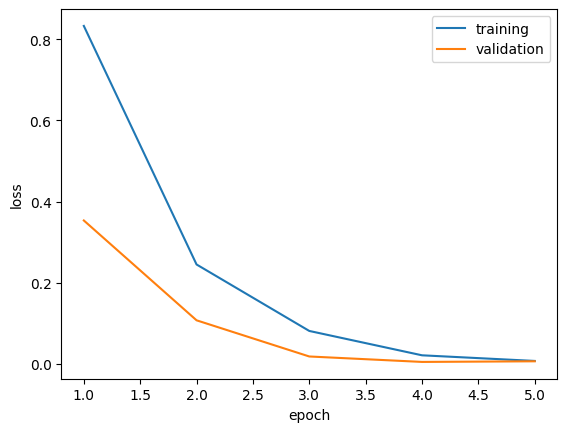

In [23]:
epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

**Evaluate the model performance**

Generating predictions from validation data...
1/1 [==============================] - 0s 193ms/step


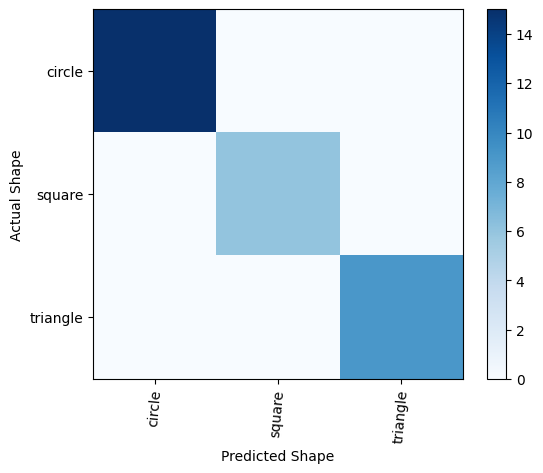

In [24]:
print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

**Use the trained model**

In [25]:
# Save the trained model
modelFileName = 'models/shape_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/shape_classifier.h5


1/1 [==============================] - 0s 93ms/step
square


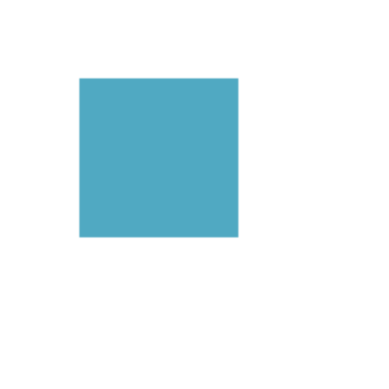

In [27]:
from random import randint

# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index

# Function to create a random image (of a square, circle, or triangle)
def create_image (size, shape):
    from random import randint
    import numpy as np
    from PIL import Image, ImageDraw
    
    xy1 = randint(10,40)
    xy2 = randint(60,100)
    col = (randint(0,200), randint(0,200), randint(0,200))

    img = Image.new("RGB", size, (255, 255, 255))
    draw = ImageDraw.Draw(img)
    
    if shape == 'circle':
        draw.ellipse([(xy1,xy1), (xy2,xy2)], fill=col)
    elif shape == 'triangle':
        draw.polygon([(xy1,xy1), (xy2,xy2), (xy2,xy1)], fill=col)
    else: # square
        draw.rectangle([(xy1,xy1), (xy2,xy2)], fill=col)
    del draw
    
    return np.array(img)

# Create a random test image
classnames = os.listdir(os.path.join('shapes'))
classnames.sort()
img = create_image ((128,128), classnames[randint(0, len(classnames)-1)])
plt.axis('off')
plt.imshow(img)

# Use the classifier to predict the class
model = models.load_model(modelFileName) # loads the saved model
class_idx = predict_image(model, img)
print (classnames[class_idx])